In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)


In [7]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [29]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [94]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


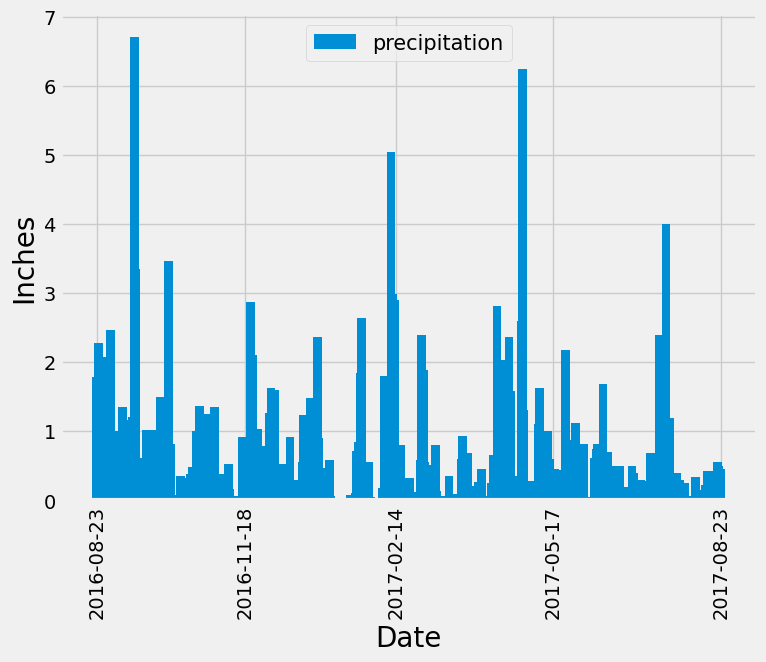

In [68]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
import datetime as dt
# Starting from the most recent data point in the database. 
most_recent_date
# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year_ago

# Perform a query to retrieve the data and precipitation scores
last_year_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_last_year_data = pd.DataFrame(last_year_data, columns =['date','precipitation'])

# Sort the dataframe by date
df_last_year_data = df_last_year_data.sort_values(by="date")
df_last_year_data

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(8, 6))
plt.bar(df_last_year_data['date'], df_last_year_data['precipitation'], width = 5, label = "precipitation")
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Inches',fontsize = 20)

ticks_dates = df_last_year_data['date'].iloc[::len(df_last_year_data) // 4]
plt.xticks(ticks_dates, rotation=90)
plt.legend(loc="upper center", fontsize = 15)
plt.show()

In [70]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_data_sum = df_last_year_data['precipitation'].describe()
print(prcp_data_sum)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64


# Exploratory Station Analysis

In [73]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.station).count()
total_stations

9

In [90]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations_query = session.query(Measurement.station, func.count(Measurement.station).label('count')).group_by(Measurement.station).order_by(func.count(Measurement.station).desc())
active_stations = active_stations_query.all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [95]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_id = active_stations[0][0]
temp_most_active_id = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == most_active_id).first()
temp_most_active_id

54.0

Text(0, 0.5, 'Frequency')

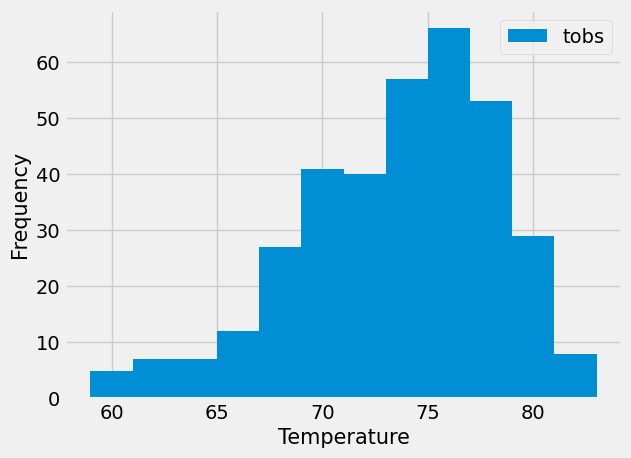

In [92]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data_prev_year = session.query(Measurement.tobs).filter(Measurement.date >= one_year_ago).filter(Measurement.station == most_active_id).all()
temp_data_df = pd.DataFrame(temp_data_prev_year)
temp_data_df.plot.hist(bins=12)
plt.xlabel('Temperature', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)


# Close Session

In [16]:
# Close Session
session.close()
engine.dispose()